# About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

CustomerID
Genre
Age
AnnualIncome(k$)
Spending_Score

Our goal is to group/cluster these customers.

Note: This is the same data as week 10 lab.

# DBSCAN vs. K-Means
K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Most of the time, we won’t know what a reasonable k value is from the start.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions. The below figure illustrates the fact:

# How The Algorithm Creates Clusters
The algorithm start by picking a point x from your dataset at random and assign it to a cluster 1. Then it counts how many points are located within the ε (epsilon) distance from x. If this quantity is greater than or equal to minPoints (n), then we consider it as a core point. Then it will pull out all these ε-neighbours to the same cluster 1. It will then examine each member of cluster 1 and find their respective ε-neighbours. If some member of cluster 1 has n or more ε-neighbours, it will expand cluster 1 by adding those ε-neighbours to the cluster. It will continue expanding cluster 1 until there are no more examples to put in it. In the latter case, it will pick another point from the dataset not belonging to any cluster and put it to cluster 2. It will continue like this until all examples either belong to some cluster or are marked as outliers.

There are three types of points after the DBSCAN clustering is complete:

Core: This is a point that has at least minPoints points within distance ε from itself.
Border: This is a point that has at least one Core point at a distance ε.
Noise: This is a point that is neither a Core nor a Border. And it has less than minPoints points within distance ε from itself.

# Implementation
Similarly to the K Means lab, we won't perform much data exploration and jump to implementation, but you're welcome to explore this data as much as you'd like, or your own if working with a different dataset.

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Load the data into a pandas DataFrame
# Drop "CustomerID" column bc provides no valuable info
# calling .head()
customer_df = pd.read_csv('customers.csv')
customer_df.drop(['CustomerID'], axis=1, inplace=True)
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# calling .info() to see any missing values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


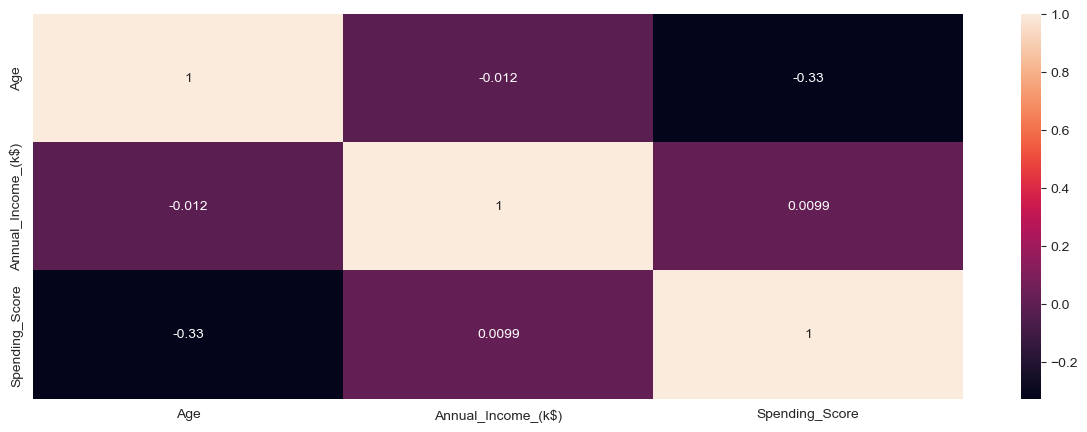

In [5]:
# create a heatmap of customer correlation data
sns.heatmap(customer_df.corr(), annot = True)
plt.show()

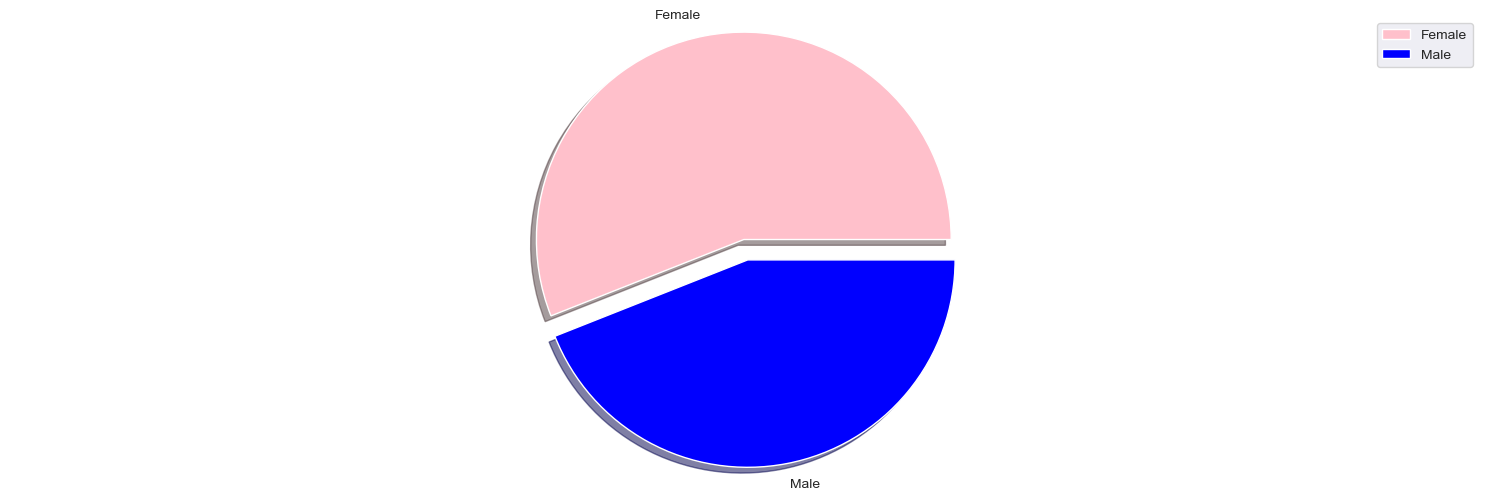

In [6]:
# Create a pie chart of "Genre" with labels = Female and male
plt.pie(customer_df['Genre'].value_counts(), labels = ['Female','Male'], colors=['Pink','Blue'], shadow=True,
        explode = [0,0.1])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

In [8]:
# Importing DBSCAN
from sklearn.cluster import DBSCAN

# set eps = 3, min_samples = 4, and metric = 'euclidean'
db = DBSCAN(eps = 3, min_samples = 4, metric = 'euclidean')

# fit the model
db.fit(X)

DBSCAN(eps=3, min_samples=4)

In [9]:
# access the label as follows
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

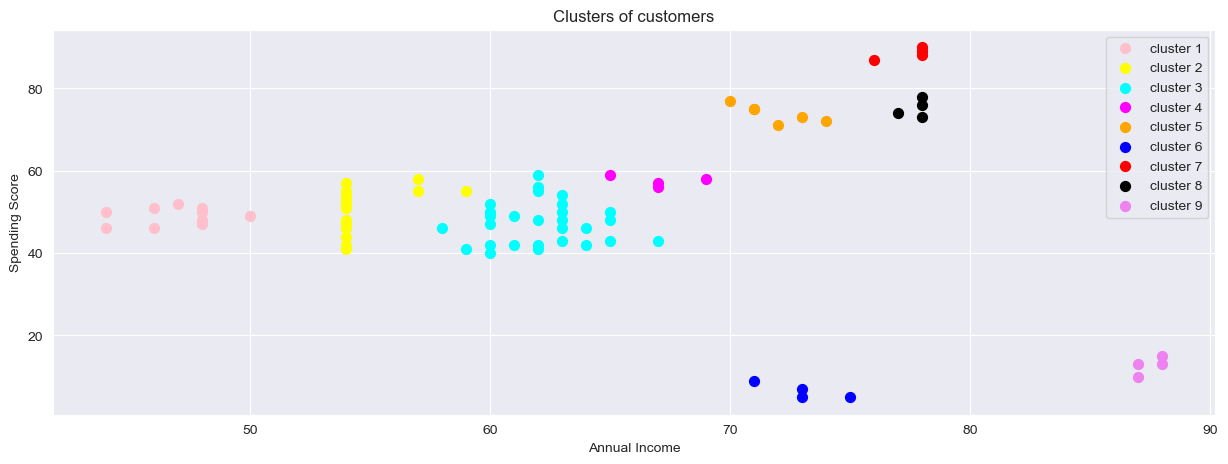

In [10]:
# Prediction the model
y_preds = db.fit_predict(X)

# Create scatterplots from our predictions and separate them by colors
plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X[y_preds == 3, 0], X[y_preds == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X[y_preds == 4, 0], X[y_preds == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X[y_preds == 5, 0], X[y_preds == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X[y_preds == 6, 0], X[y_preds == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.scatter(X[y_preds == 7, 0], X[y_preds == 7, 1], s = 50, c = 'black', label='cluster 8')
plt.scatter(X[y_preds == 8, 0], X[y_preds == 8, 1], s = 50, c = 'violet', label='cluster 9')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Now I use different data set for practice.

In [11]:
# Load the data into a pandas DataFrame
# calling .head() to return first 5 data values
cc_df = pd.read_csv('CC GENERAL.csv')
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
# Drop "CUST_ID" and "PRC_FULL_PAYMENT" column bc provides no valuable info
cc_df.drop(['CUST_ID', 'PRC_FULL_PAYMENT'], axis = 1, inplace = True)

In [13]:
# See .head() again
cc_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,12


In [14]:
# calling .info() to see any missing values
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [15]:
# See the missing value counts
cc_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
TENURE                                0
dtype: int64

In [16]:
# Drop the missing value column
cc_df.drop(['MINIMUM_PAYMENTS'], axis = 1, inplace = True)

In [17]:
# Check to see the missing value column removed
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
TENURE                              0
dtype: int64

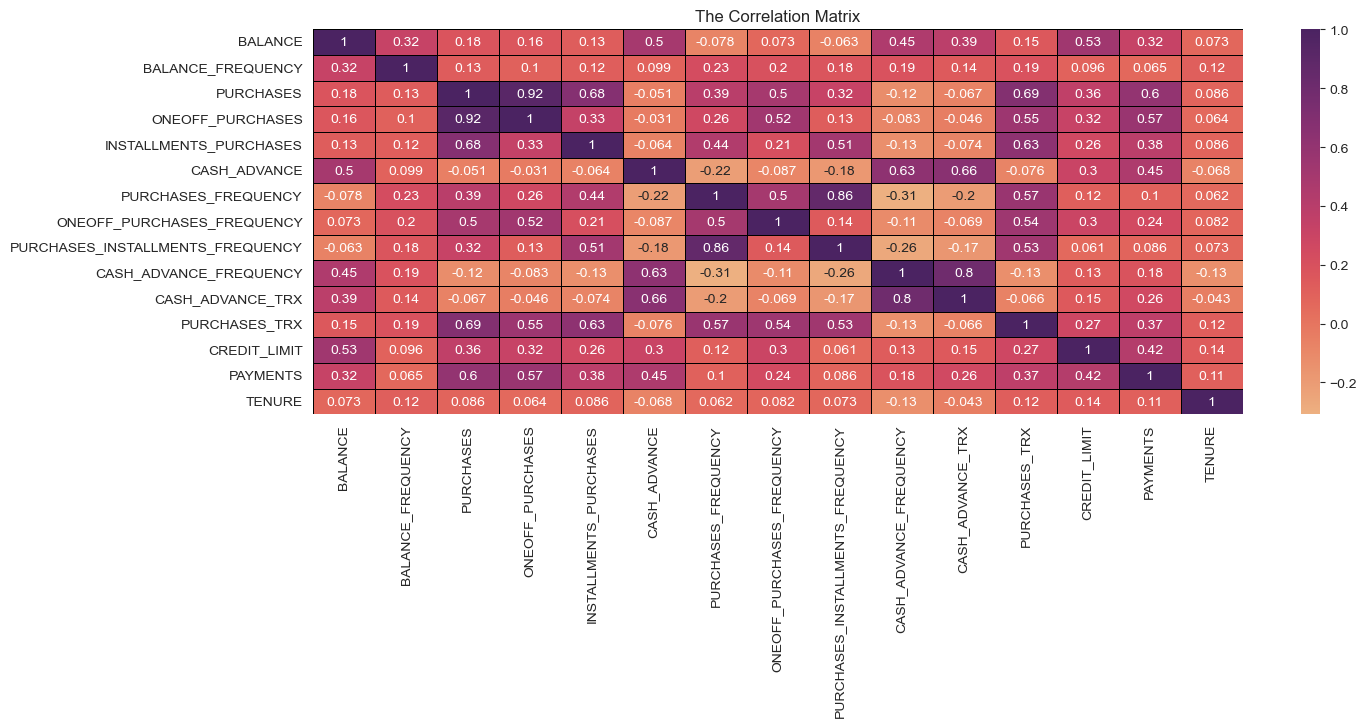

In [19]:
# create a heatmap of Credit Card correlation data
# Add black border lines
# change colors to 'flare'
# Add a title
sns.heatmap(cc_df.corr(), annot = True, linewidths = 0.7, linecolor = "black", cmap = 'flare')
plt.title("The Correlation Matrix")
plt.show()

In [20]:
# See the unique of 'TENURE' column 
cc_df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

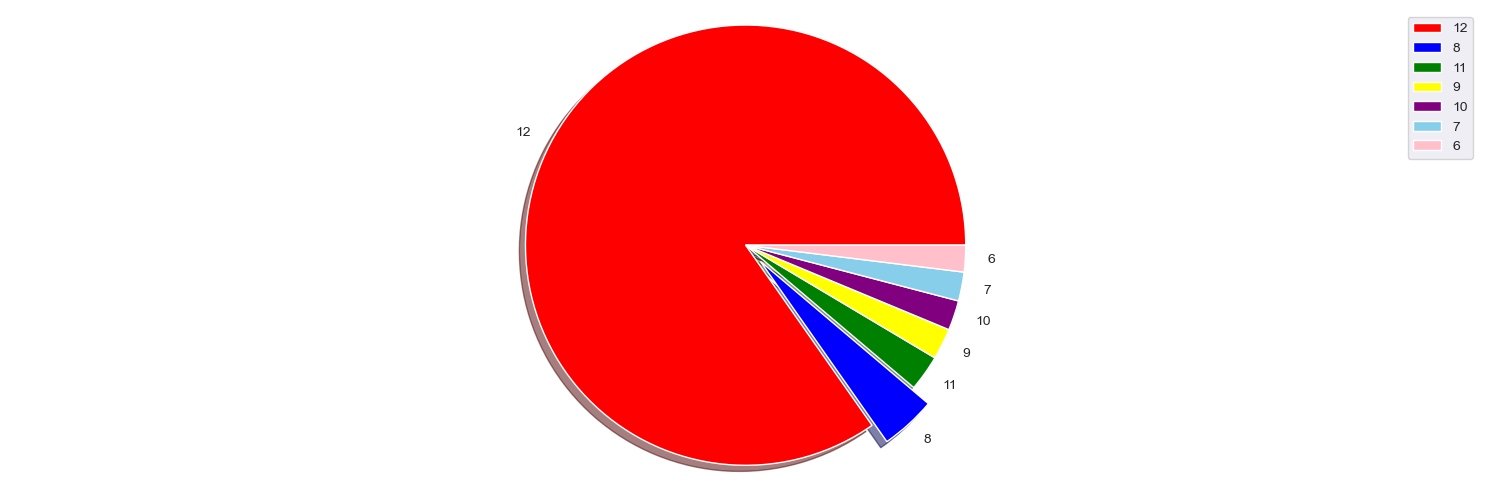

In [21]:
# Create a pie chart of "TENURE" of its labels
plt.pie(cc_df['TENURE'].value_counts(), labels = cc_df['TENURE'].unique(),
        colors = ['Red', 'Blue', 'Green', 'Yellow', 'Purple', 'Skyblue', 'Pink'], shadow = True,
        explode = [0, 0.1, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [22]:
# Saving only PURCHASES and CREDIT_LIMIT into X2.
X2 = cc_df.iloc[:, [2, 12]].values

In [23]:
# set eps = 3, min_samples = 4, and metric = 'euclidean'
db2 = DBSCAN(eps = 3, min_samples = 4, metric = 'euclidean')

# fit the model
db2.fit(X2)

DBSCAN(eps=3, min_samples=4)

In [24]:
# access the label as fo`llows
db2.labels_

array([  0,   1,  -1, ...,  80, 215,  -1], dtype=int64)

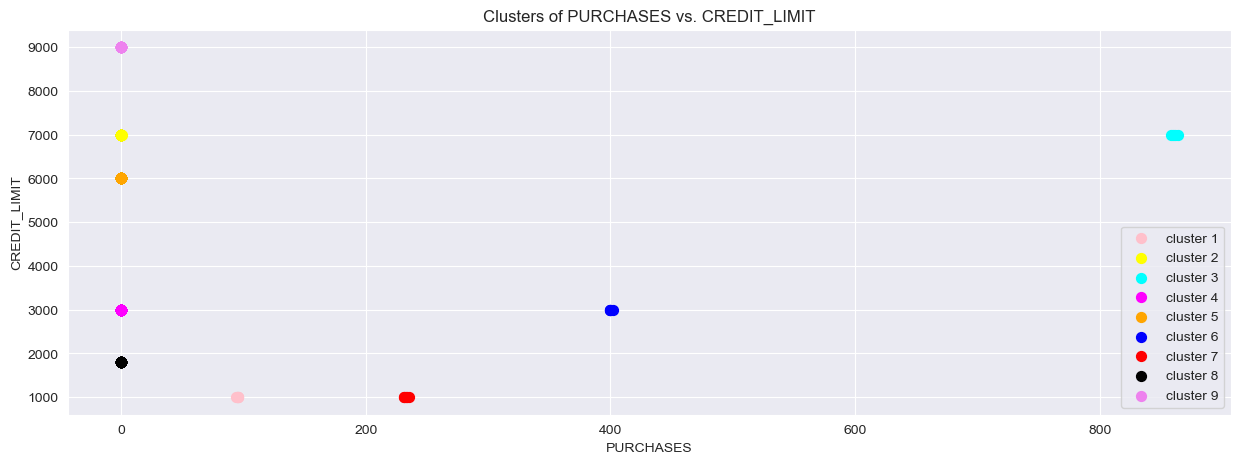

In [25]:
# Prediction the model
y_preds2 = db2.fit_predict(X2)

# Create scatterplots from our predictions and separate them by colors
plt.scatter(X2[y_preds2 == 0, 0], X2[y_preds2 == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X2[y_preds2 == 1, 0], X2[y_preds2 == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X2[y_preds2 == 2, 0], X2[y_preds2 == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X2[y_preds2 == 3, 0], X2[y_preds2 == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X2[y_preds2 == 4, 0], X2[y_preds2 == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X2[y_preds2 == 5, 0], X2[y_preds2 == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X2[y_preds2 == 6, 0], X2[y_preds2 == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.scatter(X2[y_preds2 == 7, 0], X2[y_preds2 == 7, 1], s = 50, c = 'black', label='cluster 8')
plt.scatter(X2[y_preds2 == 8, 0], X2[y_preds2 == 8, 1], s = 50, c = 'violet', label='cluster 9')
plt.title('Clusters of PURCHASES vs. CREDIT_LIMIT')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()